In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from matplotlib import pyplot
import scipy.stats
%matplotlib inline

In [2]:
fpath = 'facebook_data_businessinsider_post_sentiment.tsv'
post_data = pd.read_csv(fpath, sep='\t')
post_data.head()

,ID,PostID,PostDate,Text,Likes,Shares,PositiveScore,NegativeScore,NeutralScore,SentimentScore,TokenQnt,PositiveScoreAvg,NegativeScoreAvg,NeutralScoreAvg,SentimentScoreAvg,Vader_Positive,Vader_Negative,Vader_Neutral,Vader_Compound,Flair_Score
0,1,10158631634154071,2021-04-05 19:59:13,📲🎉 Download the new Insider app! Enjoy faster ...,357,0.0,2.571382,0.326013,15.102605,2.24537,18,0.142855,0.018112,0.839034,0.124743,0.152,0.052,0.795,0.6581,0.5158
1,2,10158726095249071,2021-05-16 18:26:45,Cargo carriers flying the e-commerce industry'...,3,2.0,0.750000,0.375000,17.875000,0.37500,19,0.039474,0.019737,0.940789,0.019737,0.089,0.000,0.911,0.4215,0.6911
2,3,10158726062944071,2021-05-16 18:14:39,"""Even toddlers know where guns are kept. So, t...",21,14.0,0.125000,0.000000,7.875000,0.12500,8,0.015625,0.000000,0.984375,0.015625,0.000,0.000,1.000,0.0000,-0.9922
3,4,10158726018794071,2021-05-16 18:02:26,Opinion | While Americans are demanding action...,46,6.0,0.125000,1.500000,10.375000,-1.37500,12,0.010417,0.125000,0.864583,-0.114583,0.170,0.170,0.660,0.2500,-0.9982
4,5,10158725993204071,2021-05-16 17:50:13,The people who must come up with words when th...,11,2.0,1.250000,1.625000,12.125000,-0.37500,15,0.083333,0.108333,0.808333,-0.025000,0.000,0.243,0.757,-0.9100,-0.9998


In [3]:
post_data['Vader_Average'] = post_data['Vader_Positive'] - post_data['Vader_Negative']

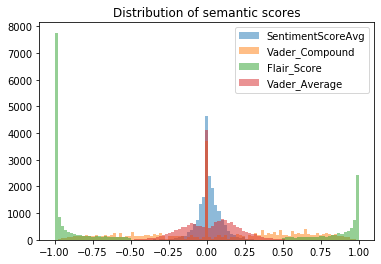

In [4]:
bins = np.linspace(-1, 1, 100)
pyplot.hist(post_data['SentimentScoreAvg'], bins, alpha=0.5, label='SentimentScoreAvg')
pyplot.hist(post_data['Vader_Compound'], bins, alpha=0.5, label='Vader_Compound')
pyplot.hist(post_data['Flair_Score'], bins, alpha=0.5, label='Flair_Score')
pyplot.hist(post_data['Vader_Average'], bins, alpha=0.5, label='Vader_Average')
pyplot.legend(loc='upper right')
pyplot.title('Distribution of semantic scores')
pyplot.show()

Text(0, 0.5, 'Posts')

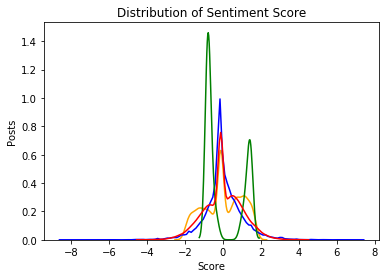

In [5]:


# seaborn histogram
sns.distplot((post_data['Vader_Compound'] - post_data['Vader_Compound'].mean())/post_data['Vader_Compound'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['SentimentScoreAvg'] - post_data['SentimentScoreAvg'].mean())/post_data['SentimentScoreAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['Flair_Score'] - post_data['Flair_Score'].mean())/post_data['Flair_Score'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['Vader_Average'] - post_data['Vader_Average'].mean())/post_data['Vader_Average'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Sentiment Score')
plt.xlabel('Score')
plt.ylabel('Posts')

In [6]:
post_data[['SentimentScoreAvg','Vader_Compound','Flair_Score','Vader_Average']].describe()

,SentimentScoreAvg,Vader_Compound,Flair_Score,Vader_Average
count,19270.000000,19270.000000,19270.000000,19270.000000
mean,0.014857,0.058504,-0.290624,0.019992
std,0.076854,0.498363,0.877472,0.164919
min,-0.625000,-0.982600,-1.000000,-0.662000
25%,-0.017857,-0.324825,-0.997700,-0.080000
50%,0.000000,0.000000,-0.911450,0.000000
75%,0.050000,0.476700,0.847325,0.127000
max,0.562500,0.984100,1.000000,0.697000


In [7]:
post_data['PostDate'] = pd.to_datetime(post_data['PostDate'], errors='coerce')

post_data['DateMonth'] = post_data['PostDate'].dt.strftime('%Y-%m')
post_data['DateDay'] = post_data['PostDate'].dt.strftime('%Y-%m-%d')

In [8]:
post_data['DateMonth'].head()

0    2021-04
1    2021-05
2    2021-05
3    2021-05
4    2021-05
Name: DateMonth, dtype: object

In [9]:
Monthly_Data = post_data.groupby('DateMonth').agg({'SentimentScore': 'sum'
                                                         ,'TokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'Flair_Score':'mean'})

In [10]:
DailyData = post_data.groupby('DateDay').agg({'SentimentScore': 'sum'
                                                         ,'TokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'Flair_Score':'mean'})

In [11]:
DailyData['SentimentScoreAdj'] = DailyData['SentimentScore']/DailyData['TokenQnt']
Monthly_Data['SentimentScoreAdj'] = Monthly_Data['SentimentScore']/Monthly_Data['TokenQnt']


In [12]:
DailyData.head()

,SentimentScore,TokenQnt,Vader_Compound,Vader_Average,Flair_Score,SentimentScoreAdj
DateDay,,,,,,
2008-07-17,0.375,1,0.000000,0.000000,0.991500,0.375000
2008-07-21,0.250,1,0.000000,0.000000,0.932900,0.250000
2009-01-20,1.375,3,-0.133967,-0.036333,0.229833,0.458333
2009-03-30,0.000,1,0.000000,0.000000,0.950300,0.000000
2009-06-04,0.750,2,0.000000,0.000000,0.749800,0.375000


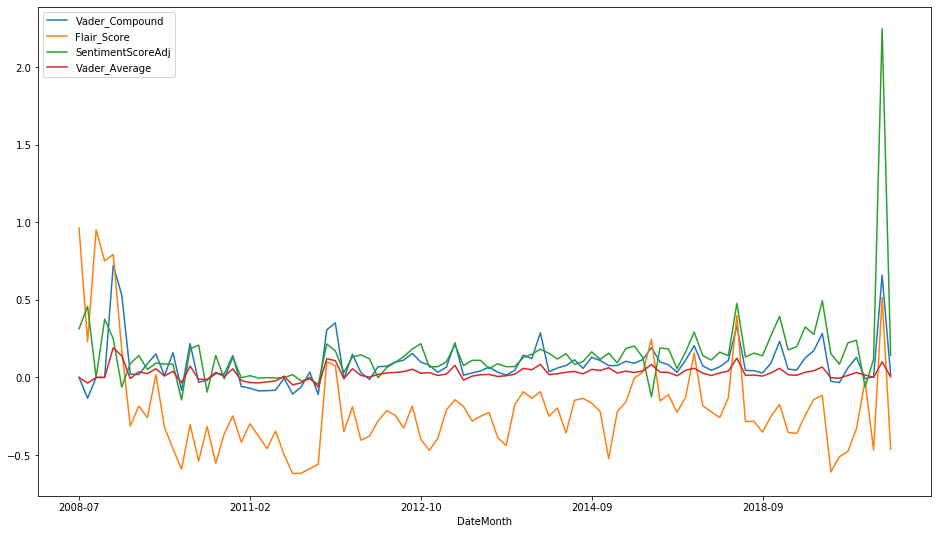

In [13]:
Monthly_Data[['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average']].plot(legend=True, figsize=(16,9))

## Download S&P from Yahoo

In [30]:
SnP_daily = web.get_data_yahoo('^GSPC','10/01/2010','03/01/2021',interval='d')
SnP_monthly = web.get_data_yahoo('^GSPC','10/01/2010','03/01/2021',interval='m')

In [31]:
SnP_monthly

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-10-01,1196.140015,1131.869995,1143.489990,1183.260010,89536270000,1183.260010
2010-11-01,1227.079956,1173.000000,1185.709961,1180.550049,87151070000,1180.550049
2010-12-01,1262.599976,1186.599976,1186.599976,1257.640015,80984530000,1257.640015
2011-01-01,1302.670044,1257.619995,1257.619995,1286.119995,92164940000,1286.119995
2011-02-01,1344.069946,1289.140015,1289.140015,1327.219971,59223660000,1327.219971
...,...,...,...,...,...,...
2020-11-01,3645.989990,3279.739990,3296.199951,3621.629883,100977880000,3621.629883
2020-12-01,3760.199951,3633.399902,3645.870117,3756.070068,96056410000,3756.070068
2021-01-01,3870.899902,3662.709961,3764.610107,3714.239990,105548790000,3714.239990


In [32]:
SnP_daily['LogReturn'] = np.log(SnP_daily['Adj Close']/SnP_daily['Adj Close'].shift(1))

In [33]:
SnP_monthly.index = SnP_monthly.index.strftime('%Y-%m')

In [34]:
SnP_monthly['LogReturn'] = np.log(SnP_monthly['Adj Close']/SnP_monthly['Adj Close'].shift(1))

## Granger test

In [35]:
Granger_data_daily = pd.merge(SnP_daily,DailyData, how= 'inner', left_index=True, right_index=True)

In [36]:
Granger_data_monthly = pd.merge(SnP_monthly,Monthly_Data, how= 'inner', left_index=True, right_index=True)

In [37]:
#Granger_data['SS_LogReturn'] = np.log((Granger_data['SentimentScoreAdj']+1)/(Granger_data['SentimentScoreAdj']+1).shift(1))

In [38]:
Granger_data_monthly

,High,Low,Open,Close,Volume,Adj Close,LogReturn,SentimentScore,TokenQnt,Vader_Compound,Vader_Average,Flair_Score,SentimentScoreAdj
2010-10,1196.140015,1131.869995,1143.489990,1183.260010,89536270000,1183.260010,NaN,2.125000,15,0.024580,0.032733,-0.553620,0.141667
2010-11,1227.079956,1173.000000,1185.709961,1180.550049,87151070000,1180.550049,-0.002293,-0.375000,39,0.022797,0.006462,-0.362523,-0.009615
2010-12,1262.599976,1186.599976,1186.599976,1257.640015,80984530000,1257.640015,0.063256,13.625000,105,0.141467,0.054952,-0.248404,0.129762
2011-01,1302.670044,1257.619995,1257.619995,1286.119995,92164940000,1286.119995,0.022393,-0.375000,137,-0.057986,-0.020657,-0.418061,-0.002737
2011-02,1344.069946,1289.140015,1289.140015,1327.219971,59223660000,1327.219971,0.031457,1.750000,154,-0.069502,-0.033240,-0.297952,0.011364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06,3233.129883,2965.659912,3038.780029,3100.290039,131044000000,3100.290039,0.018221,36.649188,431,-0.033431,-0.005146,-0.511214,0.085033
2020-09,3588.110107,3209.449951,3507.439941,3363.000000,92084120000,3363.000000,-0.040018,96.671546,434,0.061812,0.013265,-0.475767,0.222745
2020-12,3760.199951,3633.399902,3645.870117,3756.070068,96056410000,3756.070068,0.036449,101.207143,423,0.129466,0.031499,-0.329029,0.239260
2021-01,3870.899902,3662.709961,3764.610107,3714.239990,105548790000,3714.239990,-0.011199,-0.500000,8,-0.008737,0.015500,-0.024275,-0.062500


In [51]:
gc_res = grangercausalitytests(Granger_data_daily[["Vader_Compound","LogReturn"]].dropna(),11)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7876  , p=0.0953  , df_denom=1062, df_num=1
ssr based chi2 test:   chi2=2.7954  , p=0.0945  , df=1
likelihood ratio test: chi2=2.7918  , p=0.0947  , df=1
parameter F test:         F=2.7876  , p=0.0953  , df_denom=1062, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9710  , p=0.1398  , df_denom=1059, df_num=2
ssr based chi2 test:   chi2=3.9606  , p=0.1380  , df=2
likelihood ratio test: chi2=3.9532  , p=0.1385  , df=2
parameter F test:         F=1.9710  , p=0.1398  , df_denom=1059, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2908  , p=0.2762  , df_denom=1056, df_num=3
ssr based chi2 test:   chi2=3.8980  , p=0.2727  , df=3
likelihood ratio test: chi2=3.8909  , p=0.2735  , df=3
parameter F test:         F=1.2908  , p=0.2762  , df_denom=1056, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5520  , p=0.

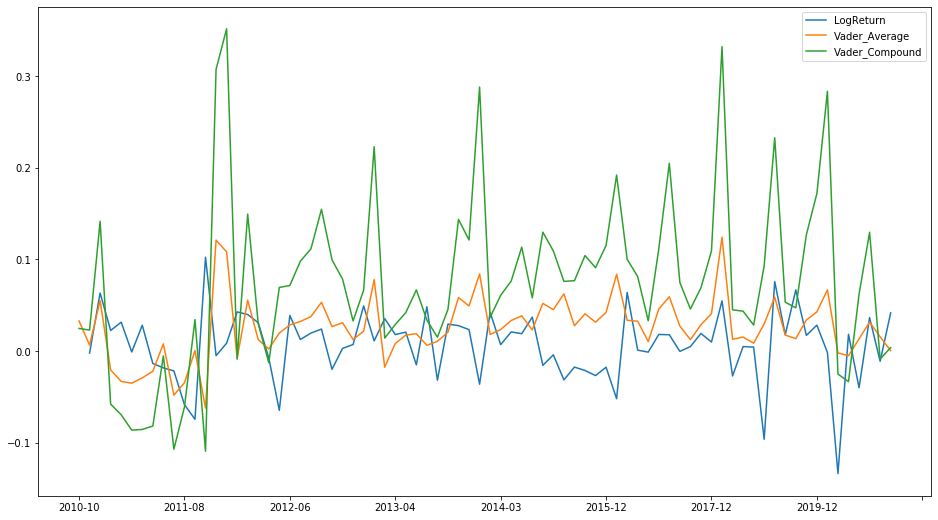

In [42]:
Granger_data_monthly[['LogReturn','Vader_Average','Vader_Compound']].plot(legend=True, figsize=(16,9))

In [43]:
corr = Granger_data_daily[['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average', 'LogReturn']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Vader_Compound,Flair_Score,SentimentScoreAdj,Vader_Average,LogReturn
Vader_Compound,1.000000,0.410598,0.408064,0.926759,0.021138
Flair_Score,0.410598,1.000000,0.270662,0.422046,0.019106
SentimentScoreAdj,0.408064,0.270662,1.000000,0.393201,0.021750
Vader_Average,0.926759,0.422046,0.393201,1.000000,0.024620
LogReturn,0.021138,0.019106,0.021750,0.024620,1.000000


In [44]:
pvals = [] 
for col in ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average']:
    pvals.append(scipy.stats.linregress(Granger_data_daily['LogReturn'][1:], Granger_data_daily[col][1:].dropna())[3])
corr_signif = pd.DataFrame(pvals,columns = ['p-value']
                           ,index = ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average'])
corr_signif

,p-value
Vader_Compound,0.490571
Flair_Score,0.533206
SentimentScoreAdj,0.478097
Vader_Average,0.421961


In [45]:
pvals_mnt = [] 
for col in ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average']:
    pvals_mnt.append(scipy.stats.linregress(Granger_data_monthly['LogReturn'][1:], Granger_data_monthly[col][1:].dropna())[3])
corr_signif_mnt = pd.DataFrame(pvals_mnt,columns = ['p-value']
                           ,index = ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average'])
corr_signif_mnt

,p-value
Vader_Compound,0.575599
Flair_Score,0.157676
SentimentScoreAdj,0.182723
Vader_Average,0.911256
